In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.io import wavfile
import os
import sys
sys.path.append("../")
import mymodule2 as mm
from exp_guitare_configs import *

%matplotlib widget

# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (12,4)

In [3]:
from vico_modphy.guitare_config import *
path_to_folder = "../../../Mesures/Mesures_2023.01.27_LAM/"

mat = loadmat(path_to_folder+"Appui_Simple_Test_2.mat")
print(mat.keys())


time = mat["time"].reshape(-1)
freq = mat["freq"].reshape(-1)
AS2_frf = mat["FRF"].reshape(-1)

Fréquence du dernier mode de corde calculé : 11636 Hz
Fréquence du dernier mode de plaque calculé : 705 Hz
dict_keys(['__header__', '__version__', '__globals__', 'FRF', 'acc_t', 'fen_acc', 'fen_mar', 'freq', 'fs', 'mar_t', 'signal_accelero_fen', 'signal_marteau_fen', 'time'])


In [4]:
mat = loadmat(path_to_folder+"Appui_Simple_Test_1.mat")
print(mat.keys())

time1 = mat["time"].reshape(-1)
freq1 = mat["freq"].reshape(-1)
AS21_frf = mat["FRF"].reshape(-1)

dict_keys(['__header__', '__version__', '__globals__', 'FRF', 'acc_t', 'fen_acc', 'fen_mar', 'freq', 'fs', 'mar_t', 'signal_accelero_fen', 'signal_marteau_fen', 'time'])


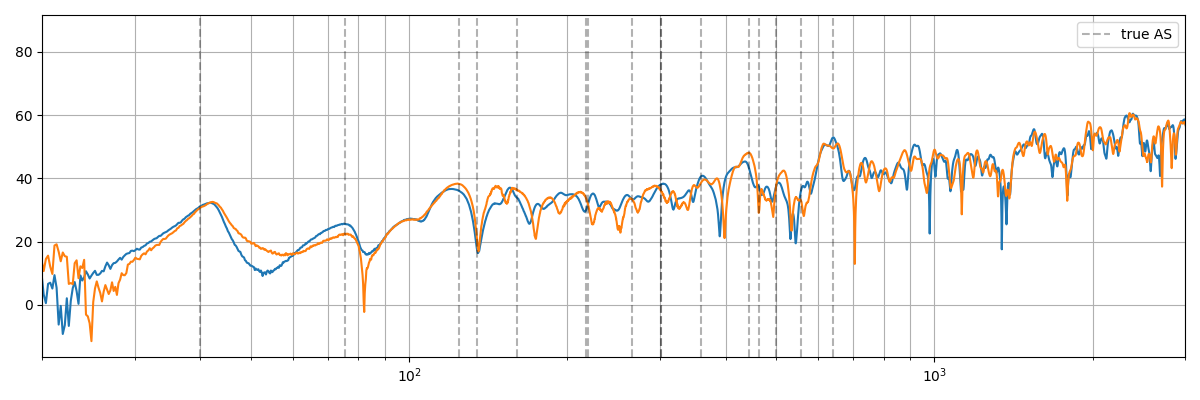

In [5]:
clamped_ratio = np.load("../vico_modphy/clamped_ratio.npy")

f11 = 40

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.semilogx(freq,20*np.log10(np.abs(AS2_frf)),label="")
ax1.semilogx(freq,20*np.log10(np.abs(AS21_frf)),label="")
ax1.grid(which="both")
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,3000)
ylims = ax1.set_ylim()
ax1.vlines(f11*fnB/fnB[0], ylims[0], ylims[1], ls="--", color="black", label="true AS", alpha=0.3)
# ax1.vlines(f11*clamped_ratio, ylims[0], ylims[1], ls="--", color="g", label="true CLAMPED", alpha=0.3)
ax1.legend()

fig.tight_layout()

plt.show()

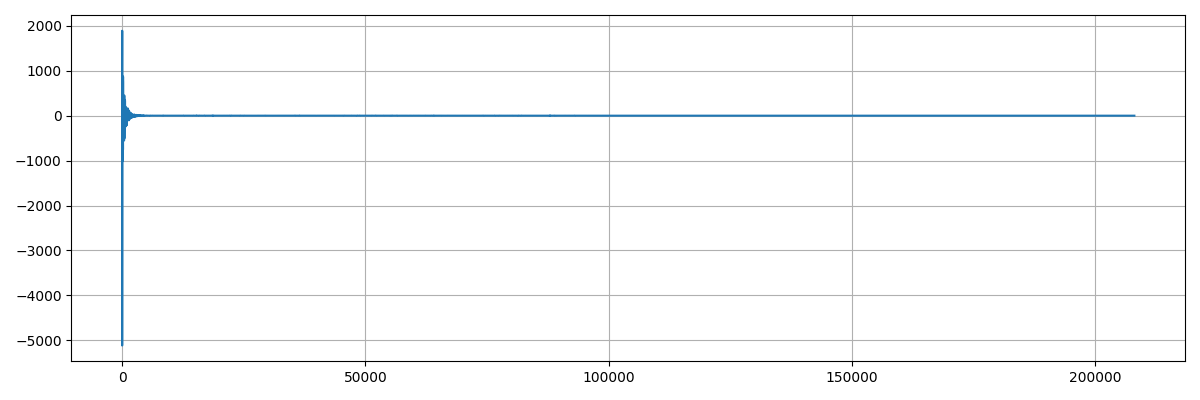

In [7]:
acc_t = mat["acc_t"].reshape(-1)

fig = plt.figure()
ax1 = fig.add_subplot(111)

time2, acc_t2 = mm.remove_init_noise(acc_t, int(mat["fs"].reshape(-1)))

# ax1.plot(acc_t,label="")
ax1.plot(acc_t2,label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim()
ax1.set_ylim()

fig.tight_layout()

plt.show()

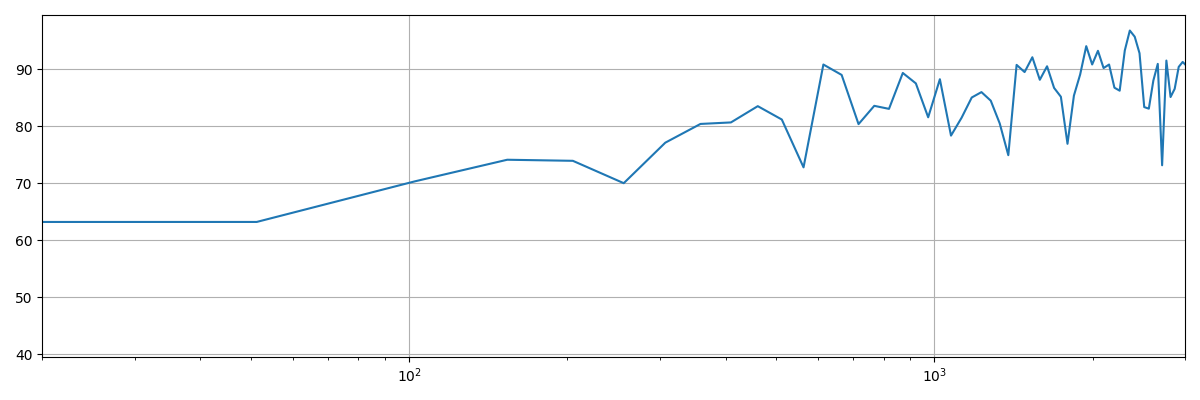

In [11]:
fs = int(mat["fs"].reshape(-1))
Y = np.fft.rfft(acc_t2[:1000])
fy = np.fft.rfftfreq(len(acc_t2[:1000]), 1/fs)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.semilogx(fy,20*np.log10(np.abs(Y)),label="")
ax1.grid()
#ax1.legend()
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title(r"")
ax1.set_xlim(20,3000)
ax1.set_ylim()

fig.tight_layout()

plt.show()